In [6]:
# 분산분석을 사용하기 위한 라이브러리를 불러오는 코드
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [42]:
import numpy as np
import pandas as pd

df = pd.read_csv('C:/Python/movie-data-analysis/data/movie.csv', encoding='ms949', index_col=[0,1])
df.head()

index     영화명         개봉일          매출액         누적매출액      관객수  \
year rank                                                                  
2010 1         0     아바타  2009-12-17  81455728000  124896892500  8151952   
     2         1     아저씨  2010-08-04  47101332000   47101332000  6178248   
     3         2     인셉션  2010-07-21  43394990000   43394990000  5827444   
     4         3     의형제  2010-02-04  40153729000   40153729000  5416812   
     5         4  아이언맨 2  2010-04-29  32635195500   32635195500  4425003   

              누적관객수  스크린수    상영횟수 대표국적                      제작사  \
year rank                                                         
2010 1     13302619   714  111860   미국            이십세기폭스필름코퍼레이션   
     2      6178248   501  109853   한국                오퍼스픽쳐스(유)   
     3      5827444   531   81891   미국     워너 브러더스 픽쳐스,레젼데리 픽쳐스   
     4      5416812   569  118243   한국  (주)쇼박스,(주)다세포클럽,루비콘픽쳐스㈜   
     5      4425003   921   87665   미국      파라마운트 픽쳐스,마블 엔터프라이즈   

                                 배급사        등급          장르        감독  \
year rank                                                              
2010 1     주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)  12세이상관람가  SF,액션,어드벤처   제임스 카메론   
     2                     씨제이엔터테인먼트   청소년관람불가      액션,드라마       이정범   
     3                 워너브러더스 코리아(주)  12세이상관람가    드라마,미스터리  크리스토퍼 놀란   
     4                        (주)쇼박스  15세이상관람가      드라마,액션        장훈   
     5                     씨제이엔터테인먼트  12세이상관람가  SF,액션,어드벤처     존 파브로   

                                                          배우  
year rank                                                     
2010 1                                    샘 워싱턴,조 샐다나,시고니 위버  
     2     원빈,김새론,김희원,김성오,김태훈,김호연,김성훈,김효민,김효서,신동민,홍석준,조영아...  
     3                           레오나르도 디카프리오,엘렌 페이지,마리온 꼬띨라르  
     4     송강호,강동원,전국환,박혁권,윤희석,최정우,정인기,설진욱,강명희,홍서백,박용진,김의...  
     5               로버트 다우니 주니어,기네스 팰트로우,돈 치들,스칼렛 요한슨,미키 루크

In [43]:
# 최근 3년간 데이터
df = df.query('year>=2016')

# <font color=red> 등급 </font>

## 등급별 매출차이

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() #컴퓨터내에 설치되 있는 맑은고딕 폰트를 가져오겠다.
rc('font',family=font_name)

Text(0, 0.5, '매출액')

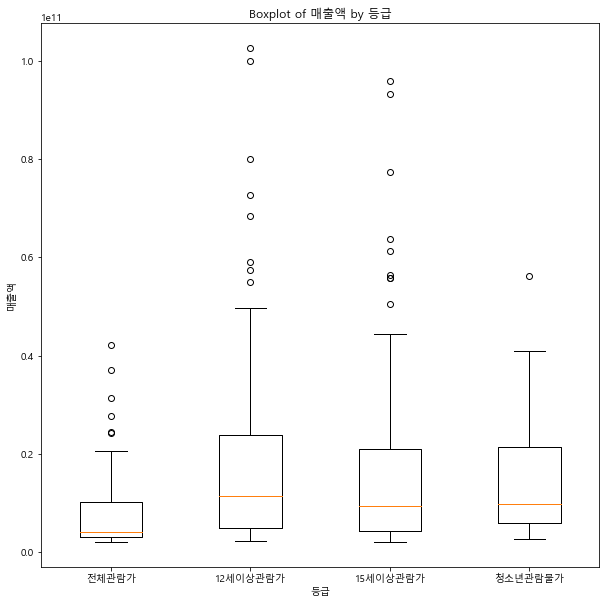

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.boxplot([df[df["등급"]=="전체관람가"]["매출액"],
            df[df["등급"]=="12세이상관람가"]["매출액"],
           df[df["등급"]=="15세이상관람가"]["매출액"],
           df[df["등급"]=="청소년관람불가"]["매출액"]],labels=["전체관람가","12세이상관람가","15세이상관람가","청소년관람불가"])

ax.set_title("Boxplot of 매출액 by 등급")
ax.set_xlabel("등급")
ax.set_ylabel("매출액")

###  등급별 anova

In [7]:
# Statsmodel을 사용한 일원분산분석

df_anova = pd.DataFrame(df, columns=['매출액','등급'])
model = ols('매출액~C(등급)',df_anova).fit()
print(anova_lm(model))

             df        sum_sq       mean_sq         F    PR(>F)
C(등급)       3.0  2.904864e+21  9.682879e+20  2.989358  0.031356
Residual  296.0  9.587785e+22  3.239117e+20       NaN       NaN


### 등급별 post-hoc

In [8]:
# p-value가 0.05보다 작으면 그룹의 평균값이 통계적으로 유의미하게 차이가 남.

df_post = df_anova.reset_index()
df_post

,year,rank,매출액,등급
0,2016,1,93178283048,15세이상관람가
1,2016,2,77320403264,15세이상관람가
2,2016,3,72672111827,12세이상관람가
3,2016,4,61269783831,15세이상관람가
4,2016,5,57529484417,12세이상관람가
5,2016,6,55101410303,12세이상관람가
6,2016,7,56444461256,15세이상관람가
7,2016,8,55863520382,15세이상관람가
8,2016,9,44393828109,12세이상관람가
9,2016,10,47481830396,12세이상관람가


             Multiple Comparison of Means - Tukey HSD,FWER=0.05             
 group1   group2      meandiff           lower            upper       reject
----------------------------------------------------------------------------
12세이상관람가 15세이상관람가 -2217803026.2069  -8323783250.0096 3888177197.5958  False 
12세이상관람가  전체관람가   -9510898728.7696 -17744200782.9517 -1277596674.5875  True 
12세이상관람가 청소년관람불가  -3074021484.1825 -13501967939.3873 7353924971.0224  False 
15세이상관람가  전체관람가   -7293095702.5627 -15526397756.7448  940206351.6194  False 
15세이상관람가 청소년관람불가  -856218457.9756  -11284164913.1804 9571727997.2293  False 
 전체관람가   청소년관람불가  6436877244.5871   -5363391205.5181 18237145694.6924 False 
----------------------------------------------------------------------------


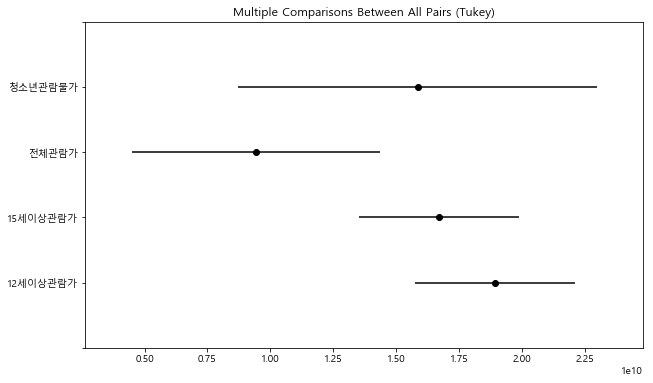

In [9]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(df_post['매출액'], df_post['등급'], alpha=0.05)
print(posthoc)

fig = posthoc.plot_simultaneous()

# 분산분석(ANOVA)를 통해 3가지 그룹간에 통계적인 차이가 있다는 것을 증명했고,
# 사후검정을 통해 그룹 1.0과 2.0의 평균이 유의미한 차이가 있다는 것을 보았습니다.

# h0: 차이가 없다
# h1: 차이가 있다
# p < 0.05 reject true. 두 그룹의 차이가 잇다
# 두 그룹간의 성질이 진짜 달라서 그게 매출액에 영향을 미치는지..틀린말
# 두 그룹 성질이 달라서 매출액이 차이가 있다.

# <font color=red> 장르 </font>

In [11]:
['판타지',
 '드라마',
 '액션',
 '어드벤처',
 'SF',
 '스릴러',
 '사극',
 '코미디',
 '범죄',
 '애니메이션',
 '미스터리',
 '가족',
 '멜로/로맨스',
 '공포(호러)',
 '뮤지컬',
 '다큐멘터리',
 '기타',
 '전쟁']

In [18]:
df[df['장르'].str.contains('판타지')]['매출액'],
df[df['장르'].str.contains('드라마')]['매출액'],
df[df['장르'].str.contains('액션')]['매출액'],
df[df['장르'].str.contains('어드벤처')]['매출액'],
df[df['장르'].str.contains('SF')]['매출액'],
df[df['장르'].str.contains('스릴러')]['매출액'],
df[df['장르'].str.contains('사극')]['매출액'],
df[df['장르'].str.contains('코미디')]['매출액'],
df[df['장르'].str.contains('범죄')]['매출액'],
df[df['장르'].str.contains('애니메이션')]['매출액'],
df[df['장르'].str.contains('미스터리')]['매출액'],
df[df['장르'].str.contains('가족')]['매출액'],
df[df['장르'].str.contains('멜로/로맨스')]['매출액'],
df[df['장르'].str.contains('공포(호러)')]['매출액'],
df[df['장르'].str.contains('뮤지컬')]['매출액'],
df[df['장르'].str.contains('다큐멘터리')]['매출액'],
df[df['장르'].str.contains('기타')]['매출액'],
df[df['장르'].str.contains('전쟁')]['매출액']

year  rank
2016  10       47481830396
      13       39300515858
      21       24467887950
      22       21841214586
      30       18906246428
      45       10142271205
      48        8999085248
      57        7621291624
      71        5127537094
      77        4145733267
      78        3946462400
      83        4204317791
2017  2        68350496432
      9        42133751579
      11       39227691395
      15       30504689978
      20       24975495122
      34       17468588886
      40       14629677795
      42       13990563383
      57        8535886061
      76        4355441358
      89        3920458500
      90        3373678655
      97        2694247700
      98        2899784921
2018  1       102666146909
      2        99926399769
      5        47355583705
      30       20816583118
      53        7934082800
      64        5001247250
      76        4120048900
      77        4218077050
      98        2349913000
Name: 매출액, dtype: int64

C:\Users\njikim\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  app.launch_new_instance()


Text(0, 0.5, '매출액')

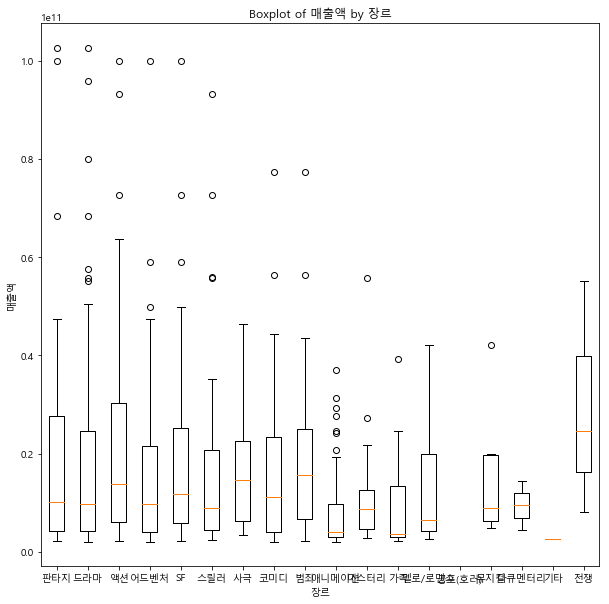

In [23]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.boxplot([df[df['장르'].str.contains('판타지')]['매출액'],
            df[df['장르'].str.contains('드라마')]['매출액'],
            df[df['장르'].str.contains('액션')]['매출액'],
            df[df['장르'].str.contains('어드벤처')]['매출액'],
            df[df['장르'].str.contains('SF')]['매출액'],
            df[df['장르'].str.contains('스릴러')]['매출액'],
            df[df['장르'].str.contains('사극')]['매출액'],
            df[df['장르'].str.contains('코미디')]['매출액'],
            df[df['장르'].str.contains('범죄')]['매출액'],
            df[df['장르'].str.contains('애니메이션')]['매출액'],
            df[df['장르'].str.contains('미스터리')]['매출액'],
            df[df['장르'].str.contains('가족')]['매출액'],
            df[df['장르'].str.contains('멜로/로맨스')]['매출액'],
            df[df['장르'].str.contains('공포(호러)')]['매출액'],
            df[df['장르'].str.contains('뮤지컬')]['매출액'],
            df[df['장르'].str.contains('다큐멘터리')]['매출액'],
            df[df['장르'].str.contains('기타')]['매출액'],
            df[df['장르'].str.contains('전쟁')]['매출액']],labels=['판타지','드라마', '액션', '어드벤처', 'SF', '스릴러', '사극', '코미디', '범죄', '애니메이션', '미스터리', '가족', '멜로/로맨스', '공포(호러)', '뮤지컬', '다큐멘터리', '기타', '전쟁'])

ax.set_title("Boxplot of 매출액 by 장르")
ax.set_xlabel("장르")
ax.set_ylabel("매출액")

###  장르별 anova

In [25]:
# Statsmodel을 사용한 일원분산분석

df_anova = pd.DataFrame(df, columns=['매출액','장르'])
model = ols('매출액~C(장르)',df_anova).fit()
print(anova_lm(model))

             df        sum_sq       mean_sq         F    PR(>F)
C(장르)     110.0  3.145654e+22  2.859685e+20  0.802779  0.896981
Residual  189.0  6.732618e+22  3.562232e+20       NaN       NaN


# 계절

In [75]:
df.head()

index            영화명         개봉일          매출액        누적매출액  \
year rank                                                               
2016 1       600            부산행  2016-07-20  93178283048  93178283048   
     2       601           검사외전  2016-02-03  77320403264  77320403264   
     3       602  캡틴 아메리카: 시빌 워  2016-04-27  72672111827  72672111827   
     4       603             밀정  2016-09-07  61269783831  61269783831   
     5       604             터널  2016-08-10  57529484417  57529484417   

                관객수     누적관객수  스크린수    상영횟수 대표국적  \
year rank                                          
2016 1     11565479  11565479  1788  151315   한국   
     2      9707581   9707581  1812  153532   한국   
     3      8677249   8677249  1991  161696   미국   
     4      7500420   7500420  1444  138161   한국   
     5      7120508   7120508  1105  113201   한국   

                                          제작사                  배급사        등급  \
year rank                                                                      
2016 1                             (주)영화사레드피터  (주)넥스트엔터테인먼트월드(NEW)  15세이상관람가   
     2                    (주)영화사 월광,(주)사나이픽처스               (주)쇼박스  15세이상관람가   
     3                                    NaN       월트디즈니컴퍼니코리아(주)  12세이상관람가   
     4     (주)다크서클픽쳐스,워너브러더스 코리아(주),(주)영화사하얼빈        워너브러더스 코리아(주)  15세이상관람가   
     5                 (주)어나더썬데이,(주)비에이엔터테인먼트               (주)쇼박스  12세이상관람가   

                  장르           감독  \
year rank                           
2016 1        액션,스릴러          연상호   
     2        범죄,코미디          이일형   
     3     액션,SF,스릴러  안소니 루소,조 루소   
     4            액션          김지운   
     5           드라마          김성훈   

                                                          배우  계절  
year rank                                                         
2016 1     공유,김정희,정유미,김율호,마동석,최우식,안소희,김의성,김수안,박민우,박민혁,임종훈...  여름  
     2     황정민,강동원,이성민,박성웅,김응수,신소율,주진모,김원해,김홍파,김병옥,박종환,전배...  겨울  
     3     크리스 에반스,로버트 다우니 주니어,스칼렛 요한슨,세바스찬 스탠,안소니 마키,돈 치...   봄  
     4     송강호,공유,한지민,츠루미 신고,엄태구,신성록,서영주,박민우,이진한,이진한,임서영,...  가을  
     5     하정우,배두나,오달수,김종수,임한빈,정민희,송민석,윤성민,이동진,이상희,최춘범,권승...  여름

In [76]:
df_season = df[['영화명', '개봉일', '매출액']].reset_index(drop=True)
df_season.head()

,영화명,개봉일,매출액
0,부산행,2016-07-20,93178283048
1,검사외전,2016-02-03,77320403264
2,캡틴 아메리카: 시빌 워,2016-04-27,72672111827
3,밀정,2016-09-07,61269783831
4,터널,2016-08-10,57529484417


In [77]:
def season(row):
    if (row['개봉일'].split('-')[1] == '03') or (row['개봉일'].split('-')[1] == '04') or (row['개봉일'].split('-')[1] == '05'):
        return '봄'
    elif (row['개봉일'].split('-')[1] == '06') or (row['개봉일'].split('-')[1] == '07') or (row['개봉일'].split('-')[1] == '08'):
        return '여름'
    elif (row['개봉일'].split('-')[1] == '09') or (row['개봉일'].split('-')[1] == '10') or (row['개봉일'].split('-')[1] == '11'):
        return '가을'
    else:
        return '겨울'

In [83]:
new_column = df.apply(lambda row: season(row), axis=1)

In [88]:
df_season['계절'] = new_column.reset_index(drop=True)

In [90]:
df_season

,영화명,개봉일,매출액,계절
0,부산행,2016-07-20,93178283048,여름
1,검사외전,2016-02-03,77320403264,겨울
2,캡틴 아메리카: 시빌 워,2016-04-27,72672111827,봄
3,밀정,2016-09-07,61269783831,가을
4,터널,2016-08-10,57529484417,여름
5,인천상륙작전,2016-07-27,55101410303,여름
6,럭키,2016-10-13,56444461256,가을
7,곡성,2016-05-12,55863520382,봄
8,덕혜옹주,2016-08-03,44393828109,여름
9,닥터 스트레인지,2016-10-26,47481830396,가을


###  boxplot

Text(0, 0.5, '매출액')

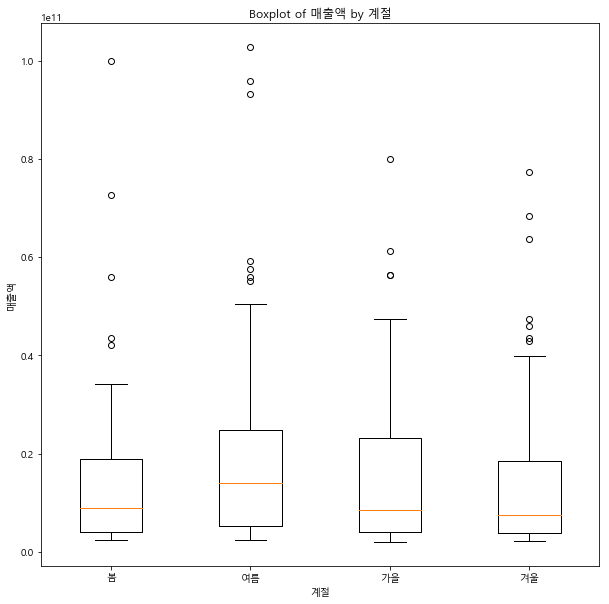

In [91]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.boxplot([df[df['계절']=='봄']['매출액'],
            df[df['계절']=='여름']['매출액'],
            df[df['계절']=='가을']['매출액'],
            df[df['계절']=='겨울']['매출액']],labels=['봄','여름','가을','겨울'])

ax.set_title("Boxplot of 매출액 by 계절")
ax.set_xlabel("계절")
ax.set_ylabel("매출액")

###  등급별 anova

In [94]:
# Statsmodel을 사용한 일원분산분석

df_season_anova = pd.DataFrame(df_season, columns=['매출액','계절'])
model = ols('매출액~C(계절)',df_season_anova).fit()
print(anova_lm(model))

             df        sum_sq       mean_sq         F    PR(>F)
C(계절)       3.0  2.442763e+21  8.142544e+20  2.501759  0.059539
Residual  296.0  9.633995e+22  3.254728e+20       NaN       NaN


### 등급별 post-hoc

In [97]:
# p-value가 0.05보다 작으면 그룹의 평균값이 통계적으로 유의미하게 차이가 남.

df_season_post = df_season_anova.reset_index()
df_season_post

,index,매출액,계절
0,0,93178283048,여름
1,1,77320403264,겨울
2,2,72672111827,봄
3,3,61269783831,가을
4,4,57529484417,여름
5,5,55101410303,여름
6,6,56444461256,가을
7,7,55863520382,봄
8,8,44393828109,여름
9,9,47481830396,가을


           Multiple Comparison of Means - Tukey HSD,FWER=0.06           
group1 group2     meandiff           lower            upper       reject
------------------------------------------------------------------------
  가을     겨울   -3078417796.0275 -10376730767.8194 4219895175.7644  False 
  가을     봄     -2572635959.0   -10525788134.5932 5380516216.5932  False 
  가을     여름   3995974175.4995   -3687500790.9204 11679449141.9193 False 
  겨울     봄     505781837.0275   -6792531134.7644 7804094808.8194  False 
  겨울     여름    7074391971.527    70926381.8576   14077857561.1964  True 
  봄      여름   6568610134.4995   -1114864831.9204 14252085100.9193 False 
------------------------------------------------------------------------


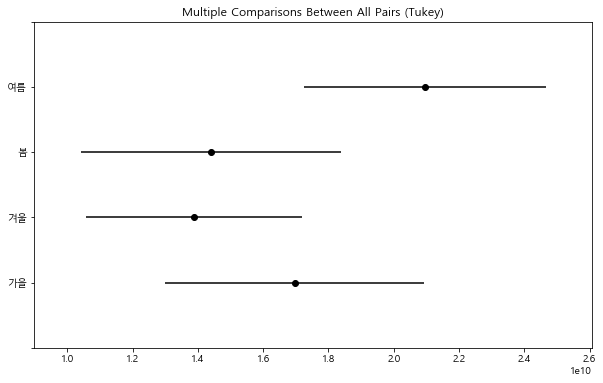

In [99]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(df_season_post['매출액'], df_season_post['계절'], alpha=0.06)
print(posthoc)

fig = posthoc.plot_simultaneous()

# 분산분석(ANOVA)를 통해 3가지 그룹간에 통계적인 차이가 있다는 것을 증명했고,
# 사후검정을 통해 그룹 1.0과 2.0의 평균이 유의미한 차이가 있다는 것을 보았습니다.

# h0: 차이가 없다
# h1: 차이가 있다
# p < 0.05 reject true. 두 그룹의 차이가 잇다
# 두 그룹간의 성질이 진짜 달라서 그게 매출액에 영향을 미치는지..틀린말
# 두 그룹 성질이 달라서 매출액이 차이가 있다.